In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
dataset_1 = pd.read_csv('data/dataset1_preprocessing.csv') 
dataset_1.head()

,title,description,content,length,article
0,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,WASHINGTON (Reuters) - The National Transporta...,578,"['ntsb', 'says', 'autopilot', 'engaged', 'cali..."
1,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,The States jobless rate fell to 5.2 per cent l...,387,"['unemployment', 'falls', 'post', 'crash', 'low']"
2,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,Louise Kennedy is showing off her autumn-winte...,432,"['louise', 'kennedy', 'aw2019', 'long', 'coats..."
3,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,"Han Kwang Song, the first North Korean footbal...",446,"['north', 'korean', 'footballer', 'han', 'join..."
4,'This Tender Land' is an affecting story about...,"""This Tender Land"" by William Kent Krueger is ...","""This Tender Land: a Novel"" (Atria Books), by ...",500,"['tender', 'land', 'affecting', 'story', 'grow..."


<h3>Vectorize data with tfidf</h3>

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(1,2) , max_features=15000)
X = tfidf_vectorizer.fit_transform(dataset_1.article.to_list())
model = X.toarray()
print(len(model), len(model[0]))

8804 3588


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(model)
datapoint = pca.transform(model)

<h3>Clustering</h3>

In [5]:
kmeans_model = MiniBatchKMeans(n_clusters=4, init='k-means++', max_iter=100) 
# X = kmeans_model.fit(model_pvdm.docvecs.doctag_syn0)
X = kmeans_model.fit(model)
labels = kmeans_model.labels_.tolist()

In [6]:
kmeans_prediction = kmeans_model.fit_predict(model)

<h3>Elbow method for finding optimal K in Kmeans</h3>

In [7]:
# function returns Within-Cluster-Sum of Squared Errors (WSS) score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = MiniBatchKMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [8]:
k_size = 10
wss = calculate_WSS(datapoint, k_size)
k = [x for x in range(k_size)]

Text(0, 0.5, 'Value of WSS')

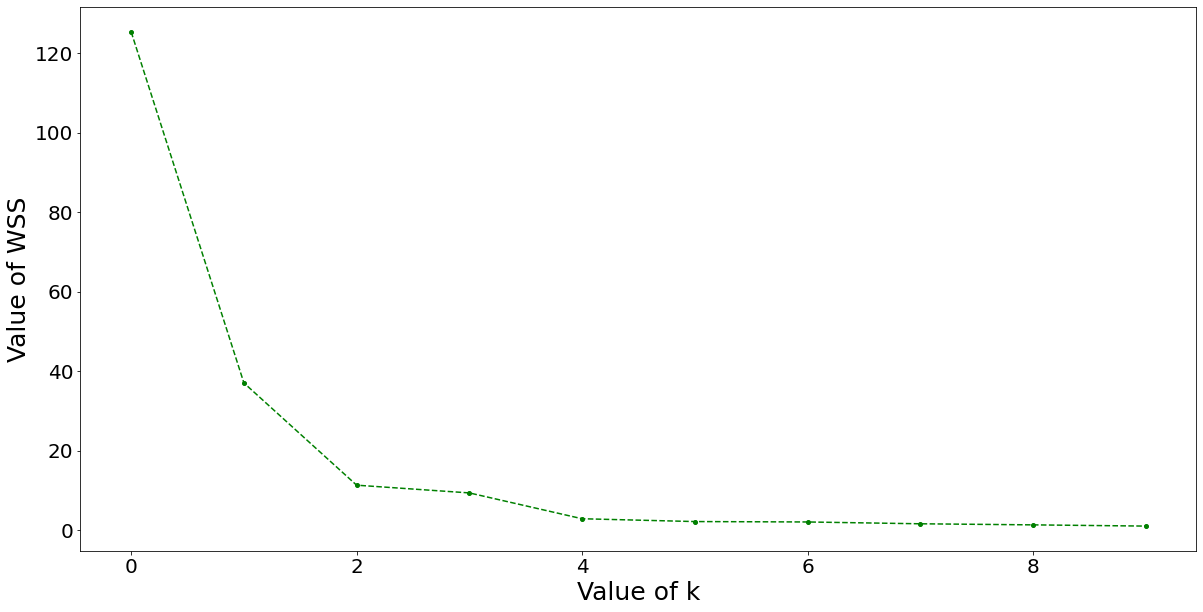

In [9]:
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k,wss,'go--', linewidth=1.5, markersize=4) # Graph is plotted.
plt.xlabel('Value of k',fontsize = 25) # x-axis is labelled.
plt.ylabel('Value of WSS',fontsize = 25) # y-axis is labelled.

<h3>The Silhouette Method</h3>

In [10]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = MiniBatchKMeans(n_clusters = k).fit(datapoint)
  labels = kmeans.labels_
  #sil.append(silhouette_score(datapoint, labels, metric = 'euclidean'))
  sil_coeff = silhouette_score(datapoint, labels, metric = 'euclidean')
  print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.8433412691059979
For n_clusters=3, The Silhouette Coefficient is 0.8923599098271129
For n_clusters=4, The Silhouette Coefficient is 0.674760489397885
For n_clusters=5, The Silhouette Coefficient is 0.7102265075573881
For n_clusters=6, The Silhouette Coefficient is 0.7074245186663607
For n_clusters=7, The Silhouette Coefficient is 0.7071036402305775
For n_clusters=8, The Silhouette Coefficient is 0.5045280212509513
For n_clusters=9, The Silhouette Coefficient is 0.5088609064799058
For n_clusters=10, The Silhouette Coefficient is 0.4745977669017074
For n_clusters=11, The Silhouette Coefficient is 0.4978710879867845
For n_clusters=12, The Silhouette Coefficient is 0.39233296619337815
For n_clusters=13, The Silhouette Coefficient is 0.47859002004051177
For n_clusters=14, The Silhouette Coefficient is 0.4549998338734759
For n_clusters=15, The Silhouette Coefficient is 0.46476598231861904
For n_clusters=16, The Silhouette Coefficient is 0.452

<h3>Visualization of Clusters</h3>

In [11]:
dataset_1["cluster"] = kmeans_prediction

dataset_1[dataset_1["cluster"]==0].head(20)

,title,description,content,length,article,cluster
53,Hong Kong targets more pro-democracy activists...,"Three leaders, including Demosisto's Ivan Lam,...","Hong Kong's pro-democracy political party, Dem...",448,"['hong', 'kong', 'targets', 'pro', 'democracy'...",0
252,China Used Twitter Porn Accounts to Spread Hon...,"Last month, Twitter took down almost 200,000 C...",A new report has claimed that the Chinese gove...,468,"['china', 'used', 'twitter', 'porn', 'accounts...",0
342,Hong Kong leader says she never discussed resi...,Hong Kong leader Carrie Lam said on Tuesday sh...,HONG KONG (Reuters) - Hong Kong leader Carrie ...,589,"['hong', 'kong', 'leader', 'says', 'never', 'd...",0
374,"She’s a Protester, He’s a Police Officer: In H...",What happens when families find themselves div...,1 U.S.\r\nPaul Manaforts Trail of Scandals,308,"['protester', 'police', 'officer', 'hong', 'ko...",0
526,Beijing Asserts Power to Declare Emergency to ...,Beijing Asserts Power to Declare Emergency to ...,Chinas top office for Hong Kong affairs said i...,628,"['beijing', 'asserts', 'power', 'declare', 'em...",0
538,FedEx says correctly handled Hong Kong package...,FedEx Corp on Tuesday said it correctly handle...,BEIJING (Reuters) - FedEx Corp (FDX.N) on Tues...,588,"['fedex', 'says', 'correctly', 'handled', 'hon...",0
614,Hong Kong Was Once Passionate About China. Now...,Hong Kong’s intellectual and emotional links w...,Even Communist Party-controlled newspapers in ...,524,"['hong', 'kong', 'passionate', 'china', 'indif...",0
657,Hong Kong leader Carrie Lam denies offering to...,Leaked comments from lunch with industry leade...,Hong Kongs chief executive has struggled to re...,413,"['hong', 'kong', 'leader', 'carrie', 'lam', 'd...",0
862,"In Hong Kong Protests, China Angrily Connects ...","More and more fervently, China is depicting Am...","Hong Kong, by contrast, still allows nongovern...",484,"['hong', 'kong', 'protests', 'china', 'angrily...",0
863,Hong Kong a priority for U.S. Senate Democrats...,Legislation addressing China's actions in Hong...,WASHINGTON (Reuters) - Legislation addressing ...,536,"['hong', 'kong', 'priority', 'us', 'senate', '...",0


In [12]:
print(len(dataset_1[dataset_1['cluster']==0]))
dataset_1[dataset_1["cluster"]==0].article.head(10)

108


53     ['hong', 'kong', 'targets', 'pro', 'democracy'...
252    ['china', 'used', 'twitter', 'porn', 'accounts...
342    ['hong', 'kong', 'leader', 'says', 'never', 'd...
374    ['protester', 'police', 'officer', 'hong', 'ko...
526    ['beijing', 'asserts', 'power', 'declare', 'em...
538    ['fedex', 'says', 'correctly', 'handled', 'hon...
614    ['hong', 'kong', 'passionate', 'china', 'indif...
657    ['hong', 'kong', 'leader', 'carrie', 'lam', 'd...
862    ['hong', 'kong', 'protests', 'china', 'angrily...
863    ['hong', 'kong', 'priority', 'us', 'senate', '...
Name: article, dtype: object

C:\Users\Rifka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


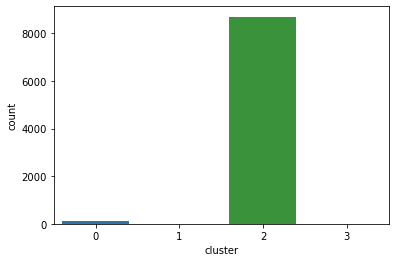

In [13]:
# Cek keseimbangan data untuk setiap cluster
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan visualisasi dalam bentuk bar chart untuk jumlah dari setiap kelas
g = sns.countplot(dataset_1['cluster'])
g.set_xticklabels(['0','1','2','3'])
plt.show()

In [14]:
# Menampilkan jumlah data untuk setiap cluster
dataset_1['cluster'].value_counts()

2    8693
0     108
3       2
1       1
Name: cluster, dtype: int64

In [15]:
dataset_1.to_csv( "data/dataset_1-cluster.csv", index=False, encoding='utf-8-sig')

<h3>TF-IDF Group</h3>

In [16]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

dataset_1["article_list"] = dataset_1["article"].apply(convert_text_list)


print(dataset_1["article_list"][90])

print("\ntype : ", type(dataset_1["article_list"][90]))

['gregor', 'townsend', 'believes', 'scotland', 'never', 'better', 'position']

type :  <class 'list'>


In [ ]:
#on progress